In [1]:
using Plots
using LinearAlgebra
using Random
using JLD
using ProgressMeter
using HePPCAT
using Statistics
using FlipPA
include("../alpcahFamily.jl")
include("../helperFunctions.jl")

heppcatWrapper_known (generic function with 1 method)

In [2]:
#Ytest = load("david/original_data.jld", "test")
#Ytrain = load("david/original_data.jld", "train");
#dataSize = size(Ytrain)[2] # both test and train are the same
using MAT
Y = matread("original_data.mat")["dropSeq"];

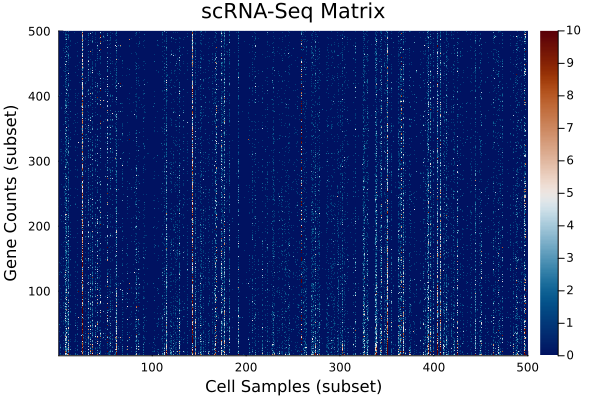

In [3]:
plot1 = heatmap(Y[1:500,1:500], clim=(0,10), cmap=:vik, xlabel="Cell Samples (subset)", ylabel="Gene Counts (subset)", title="scRNA-Seq Matrix")
#savefig("gene_matrix.pdf")

In [4]:
Y = (Y .- mean(Y, dims=2)) ./ std(Y, dims=2);

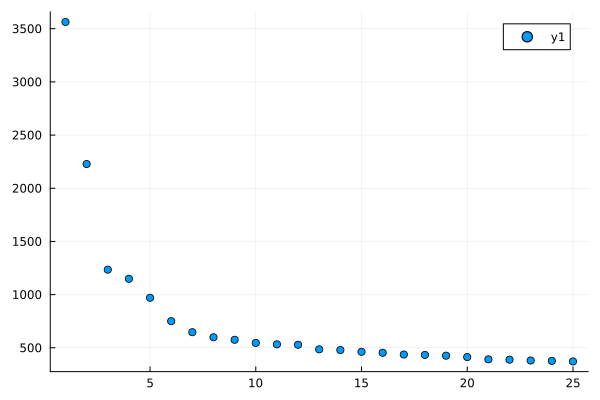

In [5]:
scatter(svdvals(Y)[1:25])

In [6]:
k = 1; ### the rank of the experiment

In [7]:
U_ALPCAH = LR_ALPCAH(Y, k, alpcahIter = 100);

In [9]:
v = grouplessVarianceUpdate(Y, U_ALPCAH*(U_ALPCAH'*Y));

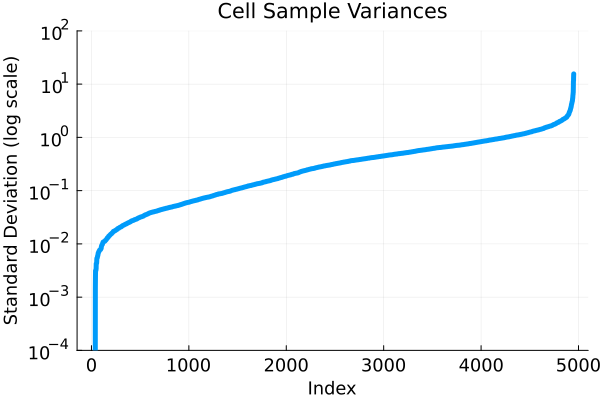

In [10]:
plot2 = plot(sort(v.^0.5)[50:end], label="",  yaxis=:log, ylim=(1e-4,1e2), linewidth=5, xlabel="Index", ylabel="Standard Deviation (log scale)", legendfontpointsize=12,xtickfontsize=12,ytickfontsize=12,guidefontsize=12, title="Cell Sample Variances")
#savefig("noise_plot.pdf")

In [11]:
pts = (v .< 0.0001) .& (v .> 0)
Utrue = PCA(Y[:,pts],k);
sum(pts)

162

In [12]:
U_PCA = PCA(Y, k);
affinityError(Utrue,U_PCA)

0.5106606976943472

In [13]:
U_ALPCAH = LR_ALPCAH(Y, k, alpcahIter= 1);
affinityError(Utrue,U_ALPCAH)

0.016670563846878667

In [13]:
# Ylist = []
# for t=1:size(Y)[2]
#     push!(Ylist, Y[:,t])
# end
# U_HEP = heppcat(Ylist, k, 10; varfloor=1e-9)
# affinityError(Utrue,U_HEP.U)

In [14]:
# U_DC = ALPCAH(Y, 1, 5000.0; μ=0.01, ρ=1.0, alpcahIter=10, varfloor=1e-9)
# affinityError(Utrue,U_DC)

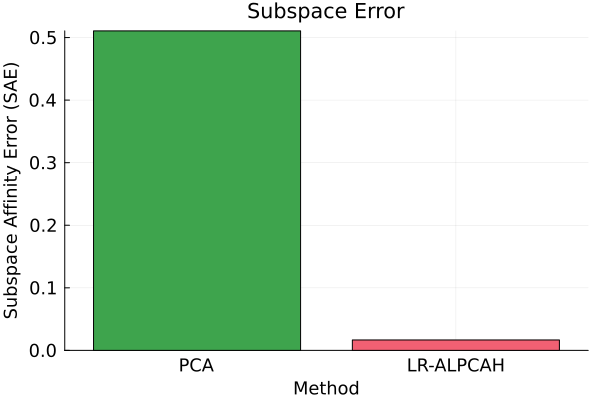

In [17]:
color = palette(:default)
plot3 = bar(["PCA", "LR-ALPCAH"], [affinityError(Utrue,U_PCA), affinityError(Utrue,U_ALPCAH)], color=[color[3], color[end-2]],label="", legendfontpointsize=12,xtickfontsize=12,ytickfontsize=12,guidefontsize=12, ylabel="Subspace Affinity Error (SAE)", xlabel="Method", title="Subspace Error")

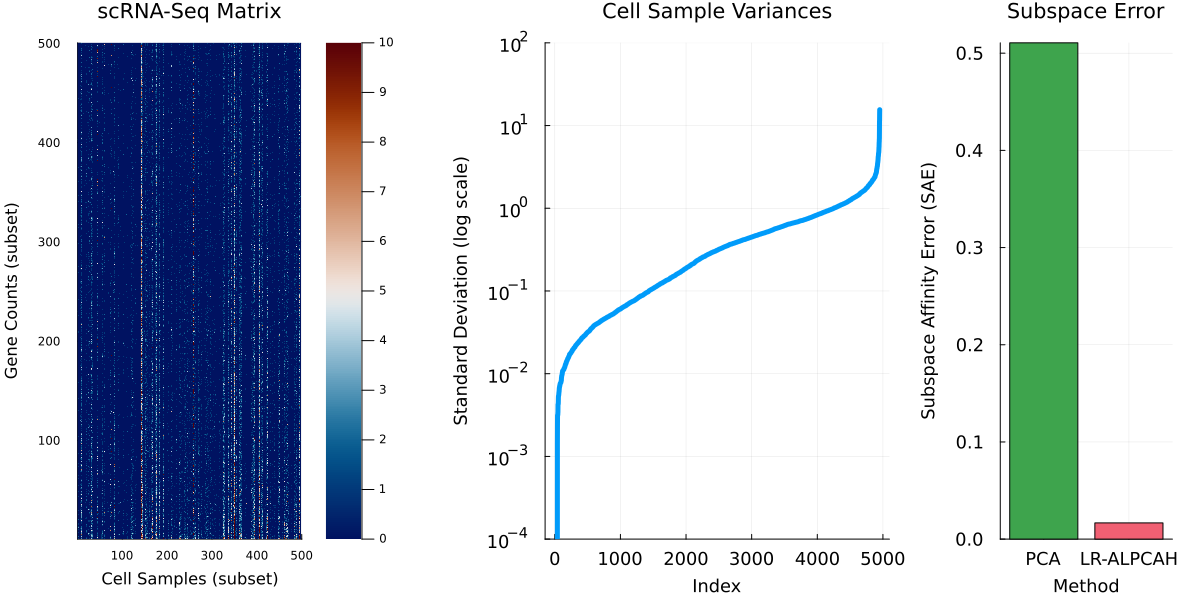

In [21]:
using Measures
layout = @layout [a{0.4w} b{0.4w} c{0.2w}]
plot(plot1, plot2,plot3, layout=layout, size=(1200, 600), bottom_margin=5mm, left_margin=5mm, right_margin=5mm, top_margin=5mm)
#savefig("combined_plot.png")